In [1]:
using DifferentialEquations
using Plots; gr()
using IntervalArithmetic
using DataInterpolations
using LinearAlgebra
using ForwardDiff

In [2]:
# nastavení p a přesná hodnota λ₁
P=3

λ1 = (P-1)*(2*(π/P)/(sin(π/P)))^P

28.28876197600255

Numericky získané první vlastní číslo λ₁: 28.28876197305467


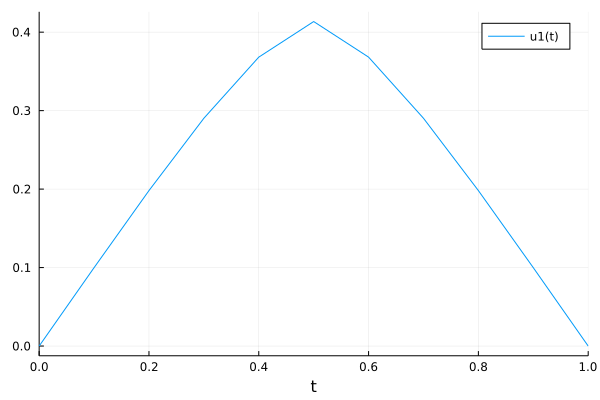

In [14]:
# řešení diferenciální soustavy metodou střelby

function sl(du,u,p,t) # parametr p je odhad na λ₁ a p z p-laplacianu
    λ, r = p
    du[1] = abs(u[2])^(r/(r-1) - 2)*u[2]
	du[2] = -λ * abs(u[1])^(r-2)*u[1]
end

u0 = [0.0; 1.0;] # počáteční podmínka
ts = 0.1 # časový krok

e = 1e-12 # zastavovací podmínka
a,b = (3.,40.)
s = (a + b)/2

while (b-a) >= e
    prob = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
    sol = solve(prob, saveat=ts, abstol=1e-8,reltol=1e-8)

    if sol(1)[1] == 0 # bere hodnotu v t=1 (pravej konec) pro první řešení soustavy u₁
        break
    else
        probA = ODEProblem(sl, u0, (0.0, 1.0), (a, P))
        solA = solve(probA, saveat=ts, abstol=1e-8,reltol=1e-8)
        
        probS = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
        solS = solve(probS, saveat=ts, abstol=1e-8,reltol=1e-8)

        if solA(1)[1] * solS(1)[1] < 0
            b = s
        else
            a = s
        end
        s = (a+b)/2
    end
end
    
prob = ODEProblem(sl, u0, (0.0, 1.0), (s, P))
sol = solve(prob, saveat=ts, abstol=1e-8,reltol=1e-8)

println("Numericky získané první vlastní číslo λ₁: $s")
plot(sol,vars=(0,1))

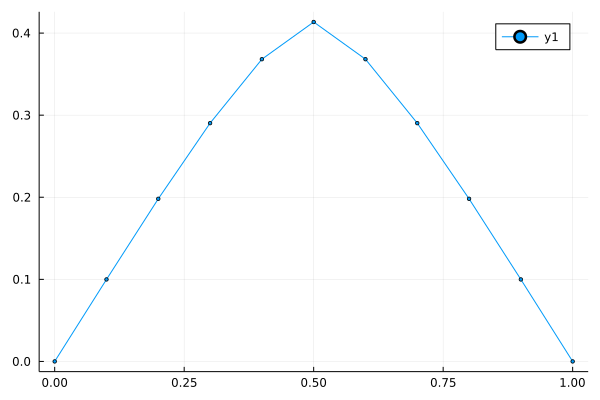

In [15]:
t = sol.t
#ti = [@interval(tmp) for tmp in sol.t]
u = [u[1] for u in sol.u]
# převedu si numerické řešení na intervaly
#ui = [@interval(u[1]) for u in sol.u]
#vykreslení bodového numerického řešení
plot(t,u, marker=2)

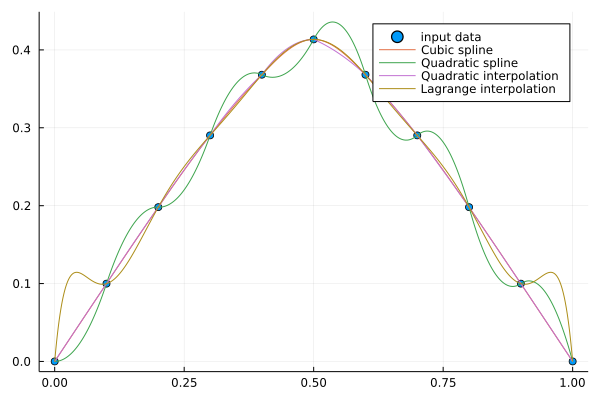

In [17]:
# proložení splinem

A = CubicSpline(u,t)
B = QuadraticSpline(u,t)
C = QuadraticInterpolation(u,t)
D = LagrangeInterpolation(u,t)
scatter(t, u, label="input data")
plot!(A, label="Cubic spline")
plot!(B, label="Quadratic spline")
plot!(C, label="Quadratic interpolation")
plot!(D, label="Lagrange interpolation")

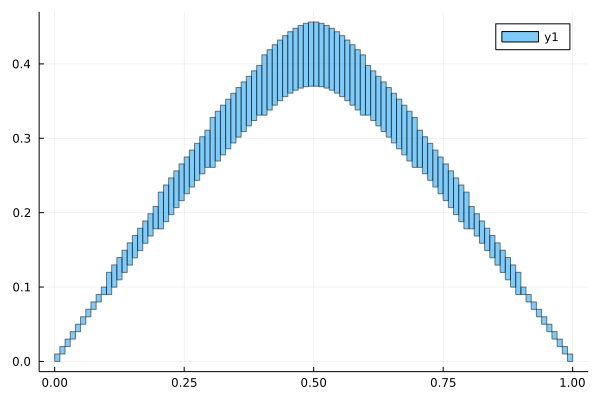

In [41]:
#vykreslení funkce intervalově
x_dom = 0..1
x_int = mince(x_dom,100)

boxes = IntervalBox.(x_int, A.(x_int))
plot(boxes)

In [42]:
uder(x) = ForwardDiff.derivative(A,x)

uder (generic function with 1 method)

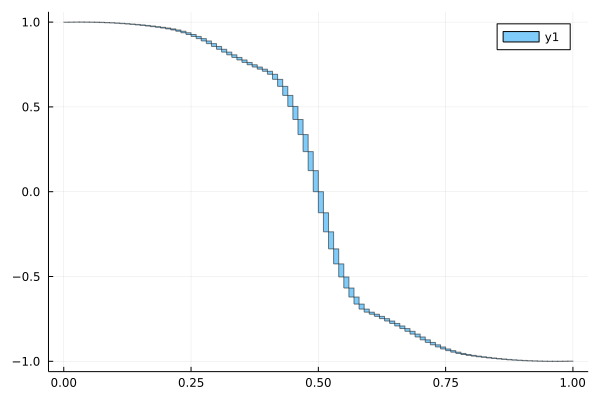

In [44]:
x_dom = 0..1
x_int = mince(x_dom,100)

boxes = IntervalBox.(x_int, uder.(x_int))
plot(boxes)

In [71]:
citatel(x) = abs(uder(x))^(P-2)*uder(x)
citd(x) = ForwardDiff.derivative(citatel,x)
#λlow(x) = - ForwardDiff.derivative(y -> abs(uder(y))^(P-2)*uder(y), x) / (A(x)^(P-1))

citd (generic function with 1 method)

In [73]:
### tak tohle zdá se taky nejde. Prostě pokud se snažím derivovat fci, která je už intervalová, tak mám smůlu
citd(0.5..0.55)

LoadError: TypeError: non-boolean (Interval{Float64}) used in boolean context

In [53]:
X = 0.5
ff(x) = abs(uder(x))^(P-2)*uder(x) 

ForwardDiff.derivative(x -> abs(uder(x))^(P-2)*uder(x) , X)
#ff(X)

-3.3599296729708656e-5